In [9]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from keras.models import Sequential
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_recall_curve, average_precision_score,precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [10]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/indian-sign-language-islrtc-referred/original_images',
    target_size=(250, 250),
    batch_size= 16,
    class_mode = 'categorical'
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    validation_split = 0.2
)
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/indian-sign-language-islrtc-referred/original_images',
    target_size=(250, 250),
    batch_size=16,
    class_mode='categorical',
    shuffle=False 
)

model = Sequential([
    layers.Conv2D(32,(2,2),activation="relu",input_shape=(250, 250,3),padding="valid"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), padding="valid"),
    
    layers.Conv2D(64,(2,2),activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128,(2,2),activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(256,(2,2),activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(512,(2,2),activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(1024,(2,2),activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(1024,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(36,activation="softmax")
])
model.summary()
from tensorflow.keras.callbacks import ModelCheckpoint
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint("model_epoch_{epoch:02d}.keras",  # Save file as 'model_epoch_01.h5', 'model_epoch_02.h5', etc.
                             save_weights_only=False,  # Saves the entire model (architecture + weights)
                             save_freq='epoch',        # Save after every epoch
                             verbose=1)
history = model.fit(
    train_generator,
    epochs=11,
    validation_data=test_generator,
    callbacks=[early_stopping,checkpoint]
)

Found 36000 images belonging to 36 classes.
Found 36000 images belonging to 36 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 249, 249, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 249, 249, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 123, 123, 64)        │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 123, 123, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 60, 60, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 29, 29, 256)         │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 29, 29, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 13, 13, 512)         │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 13, 13, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 5, 5, 1024)          │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 5, 5, 1024)          │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 2, 2, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,671,812 (29.27 MB)

 Trainable params: 7,664,196 (29.24 MB)

 Non-trainable params: 7,616 (29.75 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/11
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.1033 - loss: 3.5746
Epoch 1: saving model to model_epoch_01.keras
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 583s 253ms/step - accuracy: 0.1033 - loss: 3.5744 - val_accuracy: 0.3897 - val_loss: 2.0337
Epoch 2/11
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.3049 - loss: 2.3660
Epoch 2: saving model to model_epoch_02.keras
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 551s 245ms/step - accuracy: 0.3049 - loss: 2.3659 - val_accuracy: 0.5996 - val_loss: 1.2348
Epoch 3/11
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.4879 - loss: 1.6592
Epoch 3: saving model to model_epoch_03.keras
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 560s 249ms/step - accuracy: 0.4879 - loss: 1.6591 - val_accuracy: 0.7505 - val_loss: 0.7710
Epoch 4/11
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.6340 - loss: 1.1716
Epoch 4: saving model to model_epoch_04.keras
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 558s 248ms/step - accuracy: 0.6340 - loss: 1.1716 - val_

2250/2250 ━━━━━━━━━━━━━━━━━━━━ 483s 215ms/step - accuracy: 0.9286 - loss: 0.2248
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 75s 33ms/step - accuracy: 0.9422 - loss: 0.1737
Train Accuracy: 0.9287
Validation Accuracy: 0.9425


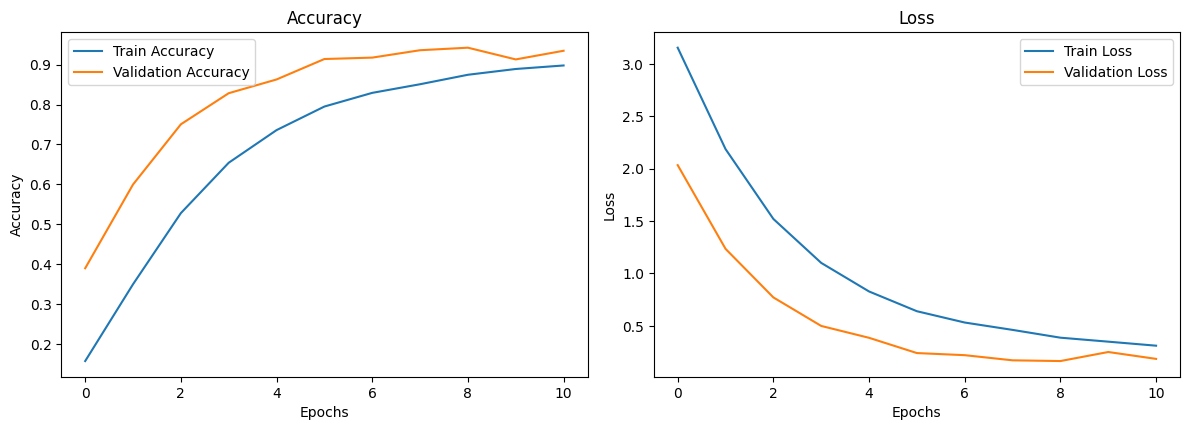

2250/2250 ━━━━━━━━━━━━━━━━━━━━ 72s 32ms/step


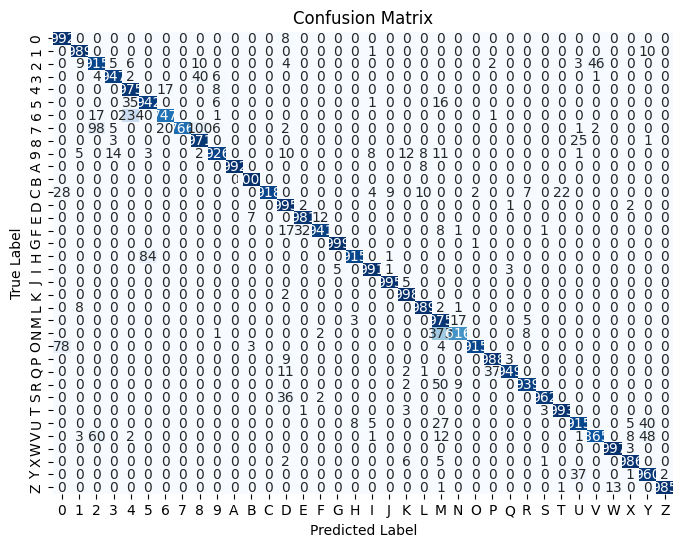

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1000
           1       0.98      0.99      0.98      1000
           2       0.84      0.92      0.87      1000
           3       0.97      0.95      0.96      1000
           4       0.78      0.97      0.87      1000
           5       0.92      0.94      0.93      1000
           6       0.95      0.75      0.84      1000
           7       1.00      0.77      0.87      1000
           8       0.86      0.97      0.91      1000
           9       0.97      0.93      0.95      1000
           A       1.00      0.99      1.00      1000
           B       0.99      1.00      1.00      1000
           C       1.00      0.92      0.96      1000
           D       0.91      0.99      0.95      1000
           E       0.97      0.98      0.97      1000
           F       0.98      0.94      0.96      1000
           G       1.00      1.00      1.00      1000
    

In [11]:
train_loss, train_acc = model.evaluate(train_generator)
val_loss, val_acc = model.evaluate(test_generator)
print(f'Train Accuracy: {train_acc:.4f}')
print(f'Validation Accuracy: {val_acc:.4f}')

# Save the model
model.save('alzeimers_multiclass.h5')

# Example usage of the prediction function
def predict_xray_image(model, img_path):
    img = image.load_img(img_path, target_size=(250, 250))  # Match size to model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)

    if prediction[0] > 0.5:
        result = 'Positive'
    else:
        result = 'Negative'

    plt.imshow(img)
    plt.title(f'Prediction: {result}')
    plt.show()

# Visualize metrics using Pandas and Matplotlib
history_df = pd.DataFrame(history.history)

# Plot multiple graphs (Accuracy and Loss)
plt.figure(figsize=(12, 8))

# Subplot for accuracy
plt.subplot(2, 2, 1)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(2, 2, 2)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Generate predictions for the test set
Y_pred = model.predict(test_generator)
Y_pred = np.argmax(Y_pred,axis=1)

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, Y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(test_generator.classes, Y_pred, target_names=test_generator.class_indices.keys()))